# BLUESKY

This notebook demos the webscraping and analysis abilities of BLUESKY.
BLUESKY is a Python package that returns information about vehicle prices.

In [1]:
# IMPORT STATEMENTS
from BLUESKY.scrapers.bs4_scraper import scrape_data_payload
from BLUESKY.scrapers.genurls import gen_cars_com_urls



import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Generating Target URLS to scrape from

In [2]:
car_dict = {
    #"ford": ["mustang", "f_150"],
    #"toyota": ["camry", "supra"],
    "bmw": ["330", "z4", "430", "m340", "m440",],
    "audi": ["a4", "s4", "s3"]
    #"acura": ["integra"],

}

url_targets = gen_cars_com_urls(input_dict=car_dict)
url_targets

['https://www.cars.com/shopping/results/?stock_type=all&makes=bmw&models=bmw-330&zip=15238&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=bmw&models=bmw-330&zip=47907&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=bmw&models=bmw-330&zip=78701&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=bmw&models=bmw-330&zip=95814&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=bmw&models=bmw-z4&zip=15238&maximum_distance=250&page_size=40&clean_title=true&no_accidents=true&personal_use=true',
 'https://www.cars.com/shopping/results/?stock_type=all&makes=bmw&models=bmw-z4&zip=47907&maximum_dis

In [3]:
temp = scrape_data_payload(url_targets)

Processing the scraped data

In [4]:
columns = ["make", "model", "model_year", "trim", "mileage", "price", "listing_id", "bodystyle", ] 

df = pd.DataFrame(temp, columns=columns)

In [9]:
%%capture --no-stdout --no-display

#z4s = df[
#    (df["make"] == "bmw")
#    & (df["model"] == "z4")
#    & (df["trim"].isin(["m40i", "sdrive35i", "sdrive35is", "3.0i_roadster"]))
#]

m340 = df[
    (df["make"] == "bmw")
    & (df["model"] == "m340")
]

m440 = df[
    (df["make"] == "bmw")
    & (df["model"] == "m440")
]


trims, counts = np.unique(np.array(m440["trim"]),return_counts=True)
for each in zip(trims, counts):
    print(each)


m440["year_delta"] = int(m440["model_year"].max()) - m440["model_year"].astype(int)
m440["price_pct"] = m440["price"].astype(float) / float(m440["price"].max()) - 1


('', 4)
('i', 28)
('i_xdrive', 70)
('m440i_xdrive', 6)


Beginning analysis. 

TODO:
- change model years to delta time from present
- depreciation per mile, per year
    - per mile per year?

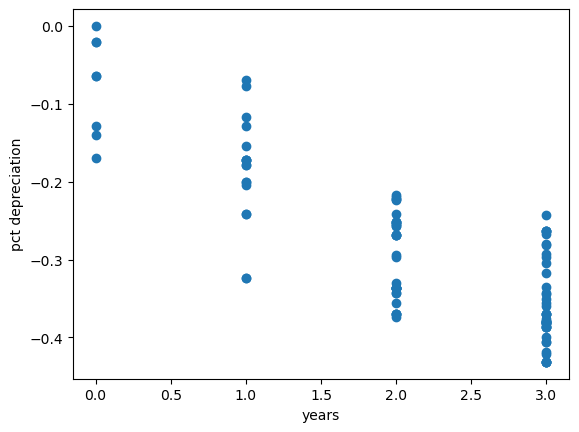

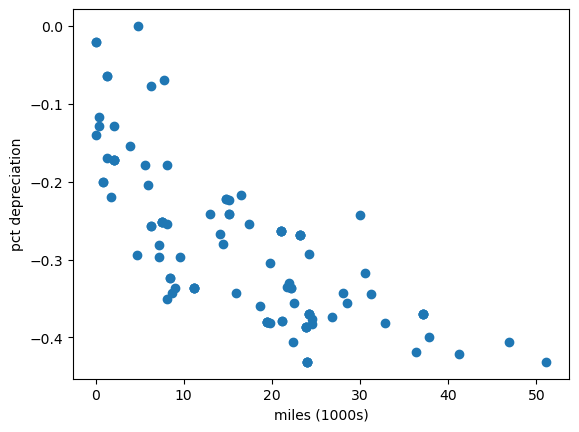

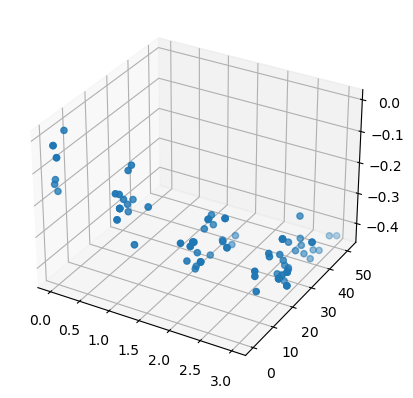

In [10]:
plt.figure(1)
plt.scatter(m440["year_delta"], m440["price_pct"])
plt.xlabel("years")
plt.ylabel("pct depreciation")

plt.figure(2)
plt.scatter(m440["mileage"].values.astype(float)/1000, m440["price_pct"])
plt.xlabel("miles (1000s)")
plt.ylabel("pct depreciation")

plt.figure(3)
ax = plt.axes(projection ="3d")
ax.scatter3D(m440["year_delta"], m440["mileage"].values.astype(float)/1000, m440["price_pct"])

